In [18]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [19]:
f = open("images/sino3.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [20]:
import numpy as np
metal3_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal3_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

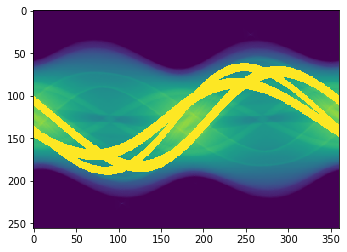

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal3_img)
plt.colorbar

In [22]:
metal3_img.shape

(256, 360)

In [23]:
for i in range(256):
    if min(metal3_img[i]) < 0:
        print("x")
max(metal3_img[100])

300.0

In [24]:
result_img = metal3_img
window_size = 3

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(window_size, 1, 1)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(300, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 3, 1, 32)          64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 1, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 1, 64)          2112      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 1, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 1, 64)          4160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [26]:
k = 0
for i in range(256-window_size-1):
    for j in range(30):
        if 0 in result_img[i:i+1+window_size,j]:
            z=0
        else:
            if 300 in result_img[i:i+1+window_size,j]:
                z = 0
            else:
                k = k+1

In [27]:
train_data = np.zeros((k,window_size,1,1))
result_data = np.zeros((k,1))
k = 0
for i in range(256-window_size-1):
    for j in range(30):
        if 0 in result_img[i:i+1+window_size,j]:
            z=0
        else:
            if 300 in result_img[i:i+1+window_size,j]:
                z = 0
            else:
                for w in range(window_size):
                    train_data[k,w,0,0] = result_img[i+w,j]
                result_data[k,0] = int(result_img[i+window_size,j])
                k = k+1
print(train_data.shape)
print(result_data.shape)

model.fit(train_data, result_data, epochs=10)

(4733, 3, 1, 1)
(4733, 1)
Epoch 1/10
148/148 [==============================] - 0s 1ms/step - loss: 5.2257 - accuracy: 0.3178
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 3.5189 - accuracy: 0.3421
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 3.4502 - accuracy: 0.3406
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 3.3959 - accuracy: 0.3412
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 3.3525 - accuracy: 0.3423
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 3.3036 - accuracy: 0.3442
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 3.2586 - accuracy: 0.3452
Epoch 8/10
148/148 [==============================] - 0s 1ms/step - loss: 3.2329 - accuracy: 0.3452
Epoch 9/10
148/148 [==============================] - 0s 1ms/step - loss: 3.1662 - accuracy: 0.3478
Epoch 10/10
148/148 [==============================] - 0s 1ms/step - loss:

In [28]:
l = 0
for i in range(256-window_size-1):
    for j in range(30):
        if result_img[i+window_size,j] == 300:
            test_data = np.zeros((1,window_size,1,1))
            for w in range(window_size):
                test_data[0,w,0,0] = result_img[i+w,j]
            prediction = model.predict(test_data)
            result_img[i+window_size,j] = np.where(prediction[0]==max(prediction[0]))[0][0]
            print(np.where(prediction[0]==max(prediction[0]))[0][0])
            l = l+1

    k = 0
    z = 0

    for i in range(256-window_size-1):
        for j in range(30):
            if 0 in result_img[i:i+window_size+1,j]:
                z=0
            else:
                if 300 in result_img[i:i+window_size+1,j]:
                    z = 0
                else:
                    k = k+1
    train_data = np.zeros((k,window_size,1,1))
    result_data = np.zeros((k,1))
            
    k = 0

    for i in range(256-window_size-1):
        for j in range(30):
            if 0 in result_img[i:i+1+window_size,j]:
                z=0
            else:
                if 300 in result_img[i:i+1+window_size,j]:
                    z = 0
                else:
                    for w in range(window_size):
                        train_data[k,w,0,0] = result_img[i+w,j]
                    result_data[k,0] = int(result_img[i+window_size,j])
                    k = k+1
    model.fit(train_data, result_data, epochs=10)

Epoch 1/10
148/148 [==============================] - 0s 1ms/step - loss: 3.1114 - accuracy: 0.3509
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 3.1063 - accuracy: 0.3526
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 2.9920 - accuracy: 0.3528
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 2.9383 - accuracy: 0.3537
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 2.8777 - accuracy: 0.3594
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 2.9047 - accuracy: 0.3552
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 2.7942 - accuracy: 0.3640
Epoch 8/10
148/148 [==============================] - 0s 1ms/step - loss: 2.7807 - accuracy: 0.3564
Epoch 9/10
148/148 [==============================] - 0s 1ms/step - loss: 2.7563 - accuracy: 0.3647
Epoch 10/10
148/148 [==============================] - 0s 1ms/step - loss: 2.7144 - accuracy: 0.3632

148/148 [==============================] - 0s 1ms/step - loss: 2.1694 - accuracy: 0.3943
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 2.0596 - accuracy: 0.4088
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 1.9770 - accuracy: 0.4126
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 2.0140 - accuracy: 0.4065
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 1.9946 - accuracy: 0.4128
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 1.9759 - accuracy: 0.4181
Epoch 8/10
148/148 [==============================] - 0s 1ms/step - loss: 2.2639 - accuracy: 0.3943
Epoch 9/10
148/148 [==============================] - 0s 1ms/step - loss: 2.0088 - accuracy: 0.4076
Epoch 10/10
148/148 [==============================] - 0s 1ms/step - loss: 1.9623 - accuracy: 0.4169
Epoch 1/10
148/148 [==============================] - 0s 1ms/step - loss: 1.9995 - accuracy: 0.4080
Epoch 2/10

Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 1.8220 - accuracy: 0.4304
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 1.9093 - accuracy: 0.4243
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 1.8809 - accuracy: 0.4283
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 1.7900 - accuracy: 0.4378
Epoch 8/10
148/148 [==============================] - 0s 1ms/step - loss: 1.8169 - accuracy: 0.4342
Epoch 9/10
148/148 [==============================] - 0s 1ms/step - loss: 1.7864 - accuracy: 0.4388
Epoch 10/10
148/148 [==============================] - 0s 1ms/step - loss: 1.8228 - accuracy: 0.4243
Epoch 1/10
148/148 [==============================] - 0s 1ms/step - loss: 1.7924 - accuracy: 0.4350
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 1.8205 - accuracy: 0.4371
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 1.7856 - accuracy: 0.4344

148/148 [==============================] - 0s 1ms/step - loss: 1.7222 - accuracy: 0.4405
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 1.6979 - accuracy: 0.4505
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 1.7898 - accuracy: 0.4390
Epoch 8/10
148/148 [==============================] - 0s 1ms/step - loss: 1.7095 - accuracy: 0.4483
Epoch 9/10
148/148 [==============================] - 0s 1ms/step - loss: 1.7575 - accuracy: 0.4464
Epoch 10/10
148/148 [==============================] - 0s 1ms/step - loss: 1.7514 - accuracy: 0.4439
Epoch 1/10
148/148 [==============================] - 0s 1ms/step - loss: 1.6950 - accuracy: 0.4507
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 1.7636 - accuracy: 0.4447
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 1.7462 - accuracy: 0.4454
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 1.7428 - accuracy: 0.4454
Epoch 5/10

Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 1.6662 - accuracy: 0.4568
Epoch 8/10
148/148 [==============================] - 0s 1ms/step - loss: 1.6819 - accuracy: 0.4460
Epoch 9/10
148/148 [==============================] - 0s 1ms/step - loss: 1.6619 - accuracy: 0.4589
Epoch 10/10
148/148 [==============================] - ETA: 0s - loss: 1.6321 - accuracy: 0.45 - 0s 1ms/step - loss: 1.6217 - accuracy: 0.4617
Epoch 1/10
148/148 [==============================] - 0s 1ms/step - loss: 1.6543 - accuracy: 0.4536
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 1.6818 - accuracy: 0.4536
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 1.8193 - accuracy: 0.4384
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 1.6926 - accuracy: 0.4496
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 1.6137 - accuracy: 0.4669
Epoch 6/10
148/148 [==============================] - 0s 

148/148 [==============================] - 0s 1ms/step - loss: 1.6139 - accuracy: 0.4644
Epoch 9/10
148/148 [==============================] - 0s 1ms/step - loss: 1.6176 - accuracy: 0.4642
Epoch 10/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5935 - accuracy: 0.4733
Epoch 1/10
148/148 [==============================] - 0s 1ms/step - loss: 1.6498 - accuracy: 0.4602
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5708 - accuracy: 0.4726
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 1.8080 - accuracy: 0.4374
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 1.6744 - accuracy: 0.4572
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5943 - accuracy: 0.4724
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5721 - accuracy: 0.4707
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 1.6032 - accuracy: 0.4583
Epoch 8/10

Epoch 10/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5774 - accuracy: 0.4729
Epoch 1/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5779 - accuracy: 0.4722
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5287 - accuracy: 0.4762
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5503 - accuracy: 0.4824
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5770 - accuracy: 0.4748
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5220 - accuracy: 0.4830
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5780 - accuracy: 0.4709
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 1.6795 - accuracy: 0.4587
Epoch 8/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5366 - accuracy: 0.4809
Epoch 9/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5292 - accuracy: 0.4815

148/148 [==============================] - 0s 1ms/step - loss: 1.5208 - accuracy: 0.4826
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5131 - accuracy: 0.4798
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4924 - accuracy: 0.4881
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5545 - accuracy: 0.4767
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5293 - accuracy: 0.4813
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 1.6206 - accuracy: 0.4733
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5640 - accuracy: 0.4779
Epoch 8/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5715 - accuracy: 0.4680
Epoch 9/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5141 - accuracy: 0.4817
Epoch 10/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5431 - accuracy: 0.4883
Epoch 1/10

148/148 [==============================] - 0s 1ms/step - loss: 1.5816 - accuracy: 0.4716
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5150 - accuracy: 0.4849
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4433 - accuracy: 0.4986
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5028 - accuracy: 0.4809
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4557 - accuracy: 0.4912
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4574 - accuracy: 0.4995
Epoch 8/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4859 - accuracy: 0.4889
Epoch 9/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5080 - accuracy: 0.4824
Epoch 10/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4607 - accuracy: 0.4851
Epoch 1/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5568 - accuracy: 0.4815
Epoch 2/10

148/148 [==============================] - 0s 1ms/step - loss: 1.4692 - accuracy: 0.4944
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4346 - accuracy: 0.5058
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4813 - accuracy: 0.4900
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4550 - accuracy: 0.4965
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4619 - accuracy: 0.4879
Epoch 8/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4251 - accuracy: 0.5039
Epoch 9/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4941 - accuracy: 0.4824
Epoch 10/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4434 - accuracy: 0.4999
Epoch 1/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4174 - accuracy: 0.5005
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4839 - accuracy: 0.4900
Epoch 3/10

148/148 [==============================] - 0s 1ms/step - loss: 1.4878 - accuracy: 0.4876
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4448 - accuracy: 0.4980
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4211 - accuracy: 0.5035
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 1.5109 - accuracy: 0.4819
Epoch 8/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4064 - accuracy: 0.5039
Epoch 9/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4220 - accuracy: 0.4969
Epoch 10/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4707 - accuracy: 0.4995
Epoch 1/10
148/148 [==============================] - 0s 1ms/step - loss: 1.6072 - accuracy: 0.4737
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4077 - accuracy: 0.5056
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 1.3863 - accuracy: 0.5191
Epoch 4/10

148/148 [==============================] - 0s 1ms/step - loss: 1.4435 - accuracy: 0.4982
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 1.3918 - accuracy: 0.5073
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4037 - accuracy: 0.4982
Epoch 8/10
148/148 [==============================] - 0s 1ms/step - loss: 1.3744 - accuracy: 0.5115
Epoch 9/10
148/148 [==============================] - 0s 1ms/step - loss: 1.3754 - accuracy: 0.5096
Epoch 10/10
148/148 [==============================] - 0s 1ms/step - loss: 1.3995 - accuracy: 0.5020
Epoch 1/10
148/148 [==============================] - 0s 1ms/step - loss: 1.8271 - accuracy: 0.4790
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 1.3888 - accuracy: 0.5174
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 1.3616 - accuracy: 0.5183
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 1.3632 - accuracy: 0.5164
Epoch 5/10

148/148 [==============================] - 0s 1ms/step - loss: 1.3548 - accuracy: 0.5174
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 1.3997 - accuracy: 0.5138
Epoch 8/10
148/148 [==============================] - 0s 1ms/step - loss: 1.3929 - accuracy: 0.5107
Epoch 9/10
148/148 [==============================] - 0s 1ms/step - loss: 1.3769 - accuracy: 0.5092
Epoch 10/10
148/148 [==============================] - 0s 1ms/step - loss: 1.3596 - accuracy: 0.5172
219
215
Epoch 1/10
148/148 [==============================] - 0s 1ms/step - loss: 1.3760 - accuracy: 0.5155
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4957 - accuracy: 0.4944
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 1.3362 - accuracy: 0.5206
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4672 - accuracy: 0.4969
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 1.4256 - accuracy: 0.5026
Ep

150/150 [==============================] - 0s 1ms/step - loss: 1.3576 - accuracy: 0.5116
Epoch 7/10
150/150 [==============================] - 0s 1ms/step - loss: 1.3301 - accuracy: 0.5208
Epoch 8/10
150/150 [==============================] - 0s 1ms/step - loss: 1.3146 - accuracy: 0.5254
Epoch 9/10
150/150 [==============================] - 0s 1ms/step - loss: 1.3643 - accuracy: 0.5124
Epoch 10/10
150/150 [==============================] - ETA: 0s - loss: 1.3825 - accuracy: 0.51 - 0s 1ms/step - loss: 1.3858 - accuracy: 0.5152
223
229
229
229
229
229
240
232
229
232
232
Epoch 1/10
150/150 [==============================] - 0s 1ms/step - loss: 1.3632 - accuracy: 0.5219
Epoch 2/10
150/150 [==============================] - 0s 1ms/step - loss: 1.3513 - accuracy: 0.5242
Epoch 3/10
150/150 [==============================] - 0s 1ms/step - loss: 1.3400 - accuracy: 0.5275
Epoch 4/10
150/150 [==============================] - 0s 1ms/step - loss: 1.3573 - accuracy: 0.5184
Epoch 5/10
150/150 [====

154/154 [==============================] - 0s 1ms/step - loss: 1.3669 - accuracy: 0.5265
Epoch 4/10
154/154 [==============================] - 0s 1ms/step - loss: 1.3396 - accuracy: 0.5318: 0s - loss: 1.3544 - accuracy: 
Epoch 5/10
154/154 [==============================] - 0s 1ms/step - loss: 1.3740 - accuracy: 0.5210
Epoch 6/10
154/154 [==============================] - 0s 1ms/step - loss: 1.3290 - accuracy: 0.5303
Epoch 7/10
154/154 [==============================] - 0s 1ms/step - loss: 1.3730 - accuracy: 0.5175
Epoch 8/10
154/154 [==============================] - 0s 1ms/step - loss: 1.3907 - accuracy: 0.5155
Epoch 9/10
154/154 [==============================] - 0s 1ms/step - loss: 1.4381 - accuracy: 0.5106
Epoch 10/10
154/154 [==============================] - 0s 1ms/step - loss: 1.3201 - accuracy: 0.5387
229
248
248
248
229
229
229
229
242
244
229
232
229
Epoch 1/10
154/154 [==============================] - 0s 1ms/step - loss: 1.3818 - accuracy: 0.5227
Epoch 2/10
154/154 [======

158/158 [==============================] - 0s 1ms/step - loss: 1.3427 - accuracy: 0.5350
249
249
229
229
229
217
229
229
217
207
207
207
207
Epoch 1/10
158/158 [==============================] - 0s 1ms/step - loss: 1.4324 - accuracy: 0.5133
Epoch 2/10
158/158 [==============================] - 0s 1ms/step - loss: 1.3566 - accuracy: 0.5355
Epoch 3/10
158/158 [==============================] - 0s 1ms/step - loss: 1.3679 - accuracy: 0.5289
Epoch 4/10
158/158 [==============================] - 0s 1ms/step - loss: 1.3320 - accuracy: 0.5393
Epoch 5/10
158/158 [==============================] - 0s 1ms/step - loss: 1.3592 - accuracy: 0.5319
Epoch 6/10
158/158 [==============================] - 0s 1ms/step - loss: 1.3594 - accuracy: 0.5363
Epoch 7/10
158/158 [==============================] - 0s 1ms/step - loss: 1.3544 - accuracy: 0.5406
Epoch 8/10
158/158 [==============================] - 0s 1ms/step - loss: 1.3738 - accuracy: 0.5230
Epoch 9/10
158/158 [==============================] - 0s 1m

161/161 [==============================] - 0s 1ms/step - loss: 1.4172 - accuracy: 0.5277
Epoch 9/10
161/161 [==============================] - 0s 1ms/step - loss: 1.3960 - accuracy: 0.5388
Epoch 10/10
161/161 [==============================] - 0s 1ms/step - loss: 1.3799 - accuracy: 0.5432
207
207
207
207
Epoch 1/10
161/161 [==============================] - 0s 1ms/step - loss: 1.4438 - accuracy: 0.5264
Epoch 2/10
161/161 [==============================] - 0s 1ms/step - loss: 1.4140 - accuracy: 0.5316
Epoch 3/10
161/161 [==============================] - 0s 1ms/step - loss: 1.4339 - accuracy: 0.5283
Epoch 4/10
161/161 [==============================] - 0s 1ms/step - loss: 1.3662 - accuracy: 0.5398
Epoch 5/10
161/161 [==============================] - 0s 1ms/step - loss: 1.3869 - accuracy: 0.5359
Epoch 6/10
161/161 [==============================] - 0s 1ms/step - loss: 1.4196 - accuracy: 0.5372
Epoch 7/10
161/161 [==============================] - 0s 1ms/step - loss: 1.4772 - accuracy: 0

Epoch 9/10
162/162 [==============================] - 0s 1ms/step - loss: 1.3916 - accuracy: 0.5417
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 1.4227 - accuracy: 0.5359
229
243
239
249
249
229
229
Epoch 1/10
162/162 [==============================] - 0s 1ms/step - loss: 1.3894 - accuracy: 0.5394
Epoch 2/10
162/162 [==============================] - 0s 1ms/step - loss: 1.3615 - accuracy: 0.5467
Epoch 3/10
162/162 [==============================] - 0s 1ms/step - loss: 1.3744 - accuracy: 0.5388
Epoch 4/10
162/162 [==============================] - 0s 1ms/step - loss: 1.3905 - accuracy: 0.5406
Epoch 5/10
162/162 [==============================] - 0s 1ms/step - loss: 1.4227 - accuracy: 0.5305
Epoch 6/10
162/162 [==============================] - ETA: 0s - loss: 1.3923 - accuracy: 0.5312 ETA: 0s - loss: 1.4327 - accuracy: 0. - 0s 1ms/step - loss: 1.3912 - accuracy: 0.5340
Epoch 7/10
162/162 [==============================] - 0s 1ms/step - loss: 1.3881 - accura

165/165 [==============================] - 0s 1ms/step - loss: 1.3944 - accuracy: 0.5387
Epoch 6/10
165/165 [==============================] - 0s 1ms/step - loss: 1.3714 - accuracy: 0.5489
Epoch 7/10
165/165 [==============================] - 0s 1ms/step - loss: 1.3533 - accuracy: 0.5476
Epoch 8/10
165/165 [==============================] - 0s 1ms/step - loss: 1.3371 - accuracy: 0.5565
Epoch 9/10
165/165 [==============================] - 0s 1ms/step - loss: 1.3377 - accuracy: 0.5487
Epoch 10/10
165/165 [==============================] - 0s 1ms/step - loss: 1.4343 - accuracy: 0.5284
229
249
249
249
249
233
229
229
229
229
229
229
229
217
217
217
217
217
217
Epoch 1/10
166/166 [==============================] - 0s 1ms/step - loss: 1.3649 - accuracy: 0.5470
Epoch 2/10
166/166 [==============================] - 0s 1ms/step - loss: 1.3836 - accuracy: 0.5364
Epoch 3/10
166/166 [==============================] - 0s 1ms/step - loss: 1.3606 - accuracy: 0.5479
Epoch 4/10
166/166 [==============

217
217
217
217
207
207
207
207
207
219
207
198
198
198
Epoch 1/10
171/171 [==============================] - 0s 1ms/step - loss: 1.4638 - accuracy: 0.5473
Epoch 2/10
171/171 [==============================] - 0s 1ms/step - loss: 1.4761 - accuracy: 0.5453
Epoch 3/10
171/171 [==============================] - 0s 1ms/step - loss: 1.4653 - accuracy: 0.5518
Epoch 4/10
171/171 [==============================] - 0s 1ms/step - loss: 1.4417 - accuracy: 0.5559
Epoch 5/10
171/171 [==============================] - 0s 1ms/step - loss: 1.4581 - accuracy: 0.5506
Epoch 6/10
171/171 [==============================] - 0s 1ms/step - loss: 1.4667 - accuracy: 0.5464
Epoch 7/10
171/171 [==============================] - 0s 1ms/step - loss: 1.5294 - accuracy: 0.5306
Epoch 8/10
171/171 [==============================] - 0s 1ms/step - loss: 1.4748 - accuracy: 0.5440
Epoch 9/10
171/171 [==============================] - 0s 1ms/step - loss: 1.4662 - accuracy: 0.5462
Epoch 10/10
171/171 [=======================

175/175 [==============================] - 0s 1ms/step - loss: 1.4779 - accuracy: 0.5523
Epoch 9/10
175/175 [==============================] - 0s 1ms/step - loss: 1.4485 - accuracy: 0.5535
Epoch 10/10
175/175 [==============================] - 0s 1ms/step - loss: 1.4648 - accuracy: 0.5460
207
229
207
198
198
198
Epoch 1/10
175/175 [==============================] - 0s 1ms/step - loss: 1.4740 - accuracy: 0.5465
Epoch 2/10
175/175 [==============================] - 0s 1ms/step - loss: 1.4426 - accuracy: 0.5546
Epoch 3/10
175/175 [==============================] - 0s 1ms/step - loss: 1.4924 - accuracy: 0.5380
Epoch 4/10
175/175 [==============================] - 0s 1ms/step - loss: 1.4725 - accuracy: 0.5462
Epoch 5/10
175/175 [==============================] - 0s 1ms/step - loss: 1.5132 - accuracy: 0.5383
Epoch 6/10
175/175 [==============================] - 0s 1ms/step - loss: 1.4808 - accuracy: 0.5490
Epoch 7/10
175/175 [==============================] - 0s 1ms/step - loss: 1.4751 - acc

176/176 [==============================] - 0s 1ms/step - loss: 1.4438 - accuracy: 0.5598
Epoch 9/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4985 - accuracy: 0.5401
Epoch 10/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4912 - accuracy: 0.5479
Epoch 1/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4618 - accuracy: 0.5504
Epoch 2/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4497 - accuracy: 0.5586
Epoch 3/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4389 - accuracy: 0.5595
Epoch 4/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4515 - accuracy: 0.5538
Epoch 5/10
176/176 [==============================] - 0s 1ms/step - loss: 1.5757 - accuracy: 0.5367
Epoch 6/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4671 - accuracy: 0.5476
Epoch 7/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4700 - accuracy: 0.5497
Epoch 8/10

Epoch 10/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4350 - accuracy: 0.5540
Epoch 1/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4209 - accuracy: 0.5540
Epoch 2/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4128 - accuracy: 0.5554
Epoch 3/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4269 - accuracy: 0.5573
Epoch 4/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4394 - accuracy: 0.5506
Epoch 5/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4155 - accuracy: 0.5584
Epoch 6/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4338 - accuracy: 0.5508
Epoch 7/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4392 - accuracy: 0.5511
Epoch 8/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4038 - accuracy: 0.5580
Epoch 9/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4207 - accuracy: 0.5547

176/176 [==============================] - 0s 1ms/step - loss: 1.4212 - accuracy: 0.5557
Epoch 2/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3876 - accuracy: 0.5632
Epoch 3/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4147 - accuracy: 0.5545
Epoch 4/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3910 - accuracy: 0.5611
Epoch 5/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4193 - accuracy: 0.5534
Epoch 6/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4278 - accuracy: 0.5515
Epoch 7/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4113 - accuracy: 0.5495
Epoch 8/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3939 - accuracy: 0.5604
Epoch 9/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3792 - accuracy: 0.5596
Epoch 10/10
176/176 [==============================] - 0s 1ms/step - loss: 1.4121 - accuracy: 0.5572
Epoch 1/10

Epoch 3/10
176/176 [==============================] - ETA: 0s - loss: 1.3936 - accuracy: 0.55 - 0s 2ms/step - loss: 1.3912 - accuracy: 0.5591
Epoch 4/10
176/176 [==============================] - 0s 2ms/step - loss: 1.3997 - accuracy: 0.5609
Epoch 5/10
176/176 [==============================] - 0s 2ms/step - loss: 1.3639 - accuracy: 0.5669
Epoch 6/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3820 - accuracy: 0.5580
Epoch 7/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3616 - accuracy: 0.5671
Epoch 8/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3685 - accuracy: 0.5620
Epoch 9/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3821 - accuracy: 0.5636
Epoch 10/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3751 - accuracy: 0.5653
Epoch 1/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3667 - accuracy: 0.5616
Epoch 2/10
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 1ms/step - loss: 1.3552 - accuracy: 0.5710
Epoch 4/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3537 - accuracy: 0.5730
Epoch 5/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3723 - accuracy: 0.5589
Epoch 6/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3679 - accuracy: 0.5655
Epoch 7/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3626 - accuracy: 0.5595
Epoch 8/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3359 - accuracy: 0.5684
Epoch 9/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3657 - accuracy: 0.5620
Epoch 10/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3518 - accuracy: 0.5689
Epoch 1/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3555 - accuracy: 0.5646
Epoch 2/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3738 - accuracy: 0.5612
Epoch 3/10

Epoch 5/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3365 - accuracy: 0.5724
Epoch 6/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3337 - accuracy: 0.5657
Epoch 7/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3107 - accuracy: 0.5804
Epoch 8/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3559 - accuracy: 0.5685
Epoch 9/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3651 - accuracy: 0.5673
Epoch 10/10
176/176 [==============================] - 0s 2ms/step - loss: 1.3481 - accuracy: 0.5707
Epoch 1/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3395 - accuracy: 0.5733
Epoch 2/10
176/176 [==============================] - 0s 2ms/step - loss: 1.5356 - accuracy: 0.5392
Epoch 3/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3608 - accuracy: 0.5664
Epoch 4/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3841 - accuracy: 0.5620

176/176 [==============================] - 0s 1ms/step - loss: 1.3576 - accuracy: 0.5641
Epoch 7/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3932 - accuracy: 0.5612
Epoch 8/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3379 - accuracy: 0.5634
Epoch 9/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3262 - accuracy: 0.5716
Epoch 10/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3340 - accuracy: 0.5676
Epoch 1/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3152 - accuracy: 0.5758
Epoch 2/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3428 - accuracy: 0.5659
Epoch 3/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3345 - accuracy: 0.5712
Epoch 4/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3394 - accuracy: 0.5749
Epoch 5/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3248 - accuracy: 0.5652
Epoch 6/10

Epoch 8/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3238 - accuracy: 0.5707
Epoch 9/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3203 - accuracy: 0.5678
Epoch 10/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3336 - accuracy: 0.5712
Epoch 1/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3467 - accuracy: 0.5628
Epoch 2/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3191 - accuracy: 0.5719
Epoch 3/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3394 - accuracy: 0.5659
Epoch 4/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3721 - accuracy: 0.5604
Epoch 5/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3055 - accuracy: 0.5717
Epoch 6/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3140 - accuracy: 0.5714
Epoch 7/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3035 - accuracy: 0.5730

176/176 [==============================] - 0s 1ms/step - loss: 1.3743 - accuracy: 0.5602
Epoch 10/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3062 - accuracy: 0.5700
Epoch 1/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3252 - accuracy: 0.5788
Epoch 2/10
176/176 [==============================] - 0s 1ms/step - loss: 1.2946 - accuracy: 0.5774
Epoch 3/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3944 - accuracy: 0.5598
Epoch 4/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3123 - accuracy: 0.5797
Epoch 5/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3099 - accuracy: 0.5760
Epoch 6/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3149 - accuracy: 0.5749
Epoch 7/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3083 - accuracy: 0.5717
Epoch 8/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3202 - accuracy: 0.5749
Epoch 9/10

176/176 [==============================] - 0s 1ms/step - loss: 1.2865 - accuracy: 0.5756
Epoch 1/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3200 - accuracy: 0.5740
Epoch 2/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3316 - accuracy: 0.5666
Epoch 3/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3045 - accuracy: 0.5726
Epoch 4/10
176/176 [==============================] - 0s 1ms/step - loss: 1.2906 - accuracy: 0.5803
Epoch 5/10
176/176 [==============================] - 0s 1ms/step - loss: 1.2949 - accuracy: 0.5772
Epoch 6/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3199 - accuracy: 0.5726
Epoch 7/10
176/176 [==============================] - 0s 1ms/step - loss: 1.2920 - accuracy: 0.5769
Epoch 8/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3092 - accuracy: 0.5758
Epoch 9/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3067 - accuracy: 0.5719
Epoch 10/10

Epoch 2/10
176/176 [==============================] - 0s 1ms/step - loss: 1.2875 - accuracy: 0.5794
Epoch 3/10
176/176 [==============================] - 0s 1ms/step - loss: 1.2811 - accuracy: 0.5813
Epoch 4/10
176/176 [==============================] - 0s 1ms/step - loss: 1.2908 - accuracy: 0.5788
Epoch 5/10
176/176 [==============================] - 0s 1ms/step - loss: 1.2883 - accuracy: 0.5804
Epoch 6/10
176/176 [==============================] - 0s 1ms/step - loss: 1.2797 - accuracy: 0.5804
Epoch 7/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3161 - accuracy: 0.5804
Epoch 8/10
176/176 [==============================] - 0s 1ms/step - loss: 1.3077 - accuracy: 0.5771
Epoch 9/10
176/176 [==============================] - 0s 1ms/step - loss: 1.2995 - accuracy: 0.5790
Epoch 10/10
176/176 [==============================] - 0s 1ms/step - loss: 1.2709 - accuracy: 0.5836
Epoch 1/10
176/176 [==============================] - 0s 1ms/step - loss: 1.2925 - accuracy: 0.5762

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

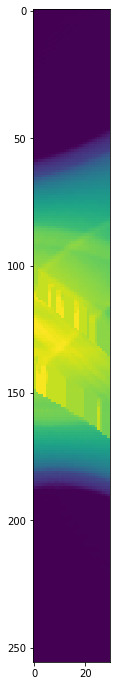

In [29]:
plt.figure(figsize=(8,12))
plt.imshow(result_img[:,0:30])
plt.colorbar

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

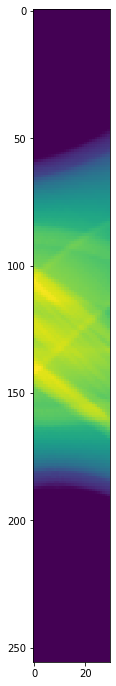

In [16]:
plt.figure(figsize=(8,12))
plt.imshow(metal0_img[:,0:30])
plt.colorbar

In [13]:
f = open("images/sino0.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [14]:
import numpy as np
metal0_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal0_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

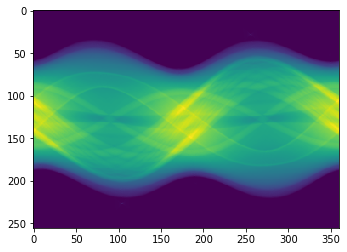

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal0_img)
plt.colorbar

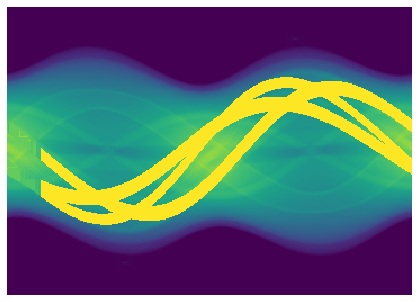

In [17]:
plt.imshow(result_img)
plt.colorbar
plt.axis('off'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
plt.savefig('images/CNN3(30).png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [ ]:
# np.savetxt('images/CNN_Metal3_3by3_training_txt.txt', result_img)